Import librairies

In [7]:
import sys
sys.path.insert(0, "../Classifier")
import importTS
import LearningClassifier
import lime_timeseries
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier as KNN
import matplotlib.pyplot as plt

Import des séries temporelles d'entrainements et de tests

In [8]:
X_train, Y_train, X_test, Y_test = importTS.dataImport("Trace")

Construction des classifieurs 1NN et LearningShapelet

In [9]:
cl = LearningClassifier.NN1_Classifier(X_train, Y_train)
cl1 = LearningClassifier.learningShapeletClassifier(X_train, Y_train)

Paramètrages : 
myTs : Série temporelle à expliquer
num_cuts : nombre de coupe dans la série temporelle
num_features : nombre de sous séries temporelle significatives
num_samples : nombre de voisins



In [28]:
num_cuts = 27
num_features = 10
num_samples = 1000
myTs = X_test[0].ravel()

Création de l'explications

In [29]:
myTSexp=lime_timeseries.TSExplainer()
exp = myTSexp.explain_instance(myTs,cl,X_train, num_cuts, num_features, num_samples)

Affichage résultat

[(3, -0.01649766719253655), (1, -0.015920668010262984), (2, -0.01578802087621405), (0, -0.014301698176682266), (4, -0.014175357881890924), (5, 0.01162860663776945), (11, -0.011443560130303045), (6, 0.011057048085625321), (12, -0.010422710056861252), (8, 0.007817689716497727)]


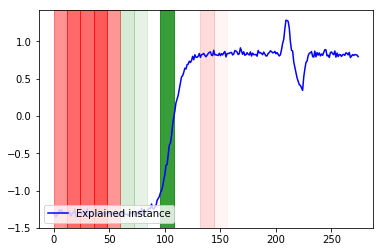

In [30]:
print(exp.as_list())
exp.domain_mapper.plot(exp, myTs, num_features)